In [6]:
import pandas as pd
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json

X_train = pd.read_csv("../data/processed/X_train.csv")
X_val = pd.read_csv("../data/processed/X_val.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").values.ravel()
y_val = pd.read_csv("../data/processed/y_val.csv").values.ravel()


In [7]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
y_prob = lr.predict_proba(X_val)[:,1]


In [8]:
metrics = {
    "accuracy": accuracy_score(y_val, y_pred),
    "precision": precision_score(y_val, y_pred),
    "recall": recall_score(y_val, y_pred),
    "f1_score": f1_score(y_val, y_pred),
    "roc_auc": roc_auc_score(y_val, y_prob)
}

metrics


{'accuracy': 0.6893004115226338,
 'precision': 0.6289592760180995,
 'recall': 0.6682692307692307,
 'f1_score': 0.6480186480186481,
 'roc_auc': 0.7488758992805755}

In [10]:
joblib.dump(lr, "../models/logistic_regression.pkl")

with open("../models/baseline_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)


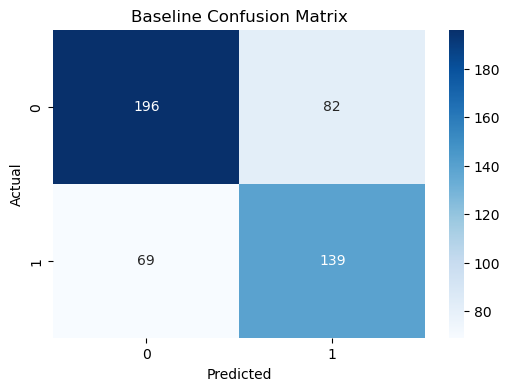

In [11]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Baseline Confusion Matrix")
plt.savefig("../visualizations/baseline_confusion_matrix.png")
plt.show()
